Predict customer churn, estimate revenue at risk, and optimize retention budget allocation to maximize revenue saved.

In [1]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


# Task
Perform an initial data exploration of the customer churn dataset "WA_Fn-UseC_-Telco-Customer-Churn.csv" by checking its shape, column names, data types, and analyzing the distribution of the 'Churn' target variable, including a visualization of this distribution.

## Check DataFrame Shape

### Subtask:
Determine and display the number of rows and columns in the DataFrame `df` using the `.shape` attribute.


**Reasoning**:
The subtask requires displaying the shape of the DataFrame `df`. The `.shape` attribute provides the number of rows and columns, and printing it will fulfill the requirement.



In [2]:
print(df.shape)

(7043, 21)


## Check Column Names

### Subtask:
Display all column names present in the DataFrame `df` to understand the available features.


**Reasoning**:
The subtask requires displaying all column names of the DataFrame `df`. The `.columns` attribute will retrieve these names, and printing them will fulfill the requirement.



In [3]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## Check Data Types

### Subtask:
Examine the data types of each column in the DataFrame `df` using the `.dtypes` attribute to identify appropriate handling methods for each feature.


**Reasoning**:
The subtask requires displaying the data types of all columns in the DataFrame `df`. The `.dtypes` attribute will provide this information, and printing it will fulfill the requirement.



In [4]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


## Analyze Target Distribution (Churn)

### Subtask:
Calculate and display the distribution of the 'Churn' column, which is the target variable. This will show the balance or imbalance of churned vs. non-churned customers.


**Reasoning**:
To analyze the distribution of the 'Churn' column, I need to use the `.value_counts()` method on the 'Churn' column of the DataFrame `df` and then print the result, which will show the counts for each unique value.



In [5]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


### Visualize Target Distribution (Churn)

#### Subtask:
Create a bar chart to visually represent the distribution of the 'Churn' target variable. This visualization will offer a clear understanding of the class balance or imbalance.

#### Instructions:
1. Import the `matplotlib.pyplot` library for plotting and `seaborn` for enhanced visualizations.
2. Use `seaborn.countplot()` to create a bar chart of the 'Churn' column.
3. Add a title to the plot, such as 'Distribution of Churn'.
4. Label the x-axis as 'Churn' and the y-axis as 'Number of Customers'.
5. Display the plot.

**Reasoning**:
To visualize the distribution of the 'Churn' column as requested, I need to use a plotting library like `seaborn` and `matplotlib.pyplot`. I will import these libraries and then use `seaborn.countplot` to generate the bar chart with appropriate labels and title.



/tmp/ipython-input-817924574.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


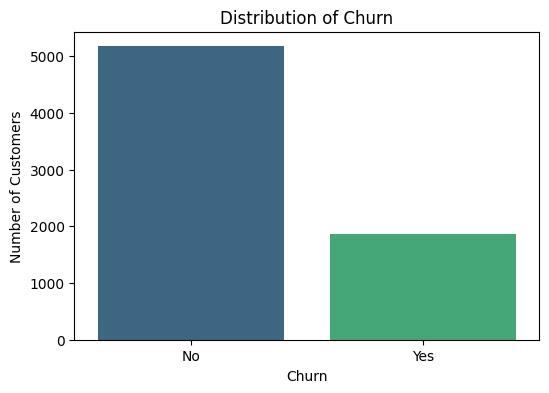

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without `hue` in `sns.countplot`. To fix this and comply with the suggested change, I will explicitly set `hue='Churn'` and `legend=False` in the `countplot` function.



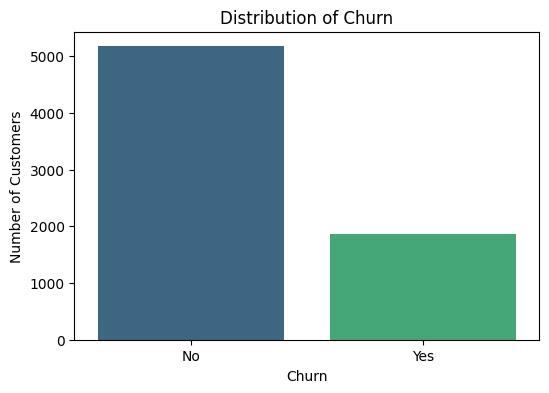

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='viridis', legend=False)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

## Final Task

### Subtask:
Summarize the findings from the data checks, including observations about the shape, column names, data types, and the initial distribution of the 'Churn' target variable.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 7043 rows and 21 columns.
*   The DataFrame includes columns such as `customerID`, `gender`, `SeniorCitizen`, `Partner`, `Dependents`, various service-related features (`PhoneService`, `InternetService`, `OnlineSecurity`, etc.), `Contract`, `PaymentMethod`, billing information (`MonthlyCharges`, `TotalCharges`), and the target variable `Churn`.
*   Most columns are of `object` data type, including `customerID`, `gender`, service-related features, `PaymentMethod`, `TotalCharges`, and `Churn`.
*   `SeniorCitizen` and `tenure` are `int64` data types.
*   `MonthlyCharges` is a `float64` data type.
*   The `TotalCharges` column is identified as an `object` data type, suggesting it may contain non-numeric values that require cleaning.
*   The `Churn` target variable distribution shows a significant imbalance: 5174 customers did not churn ('No'), while 1869 customers did churn ('Yes'). This indicates that approximately 26.5% of customers churned.

### Insights or Next Steps

*   The `TotalCharges` column needs to be converted to a numeric data type after addressing any non-numeric values to ensure it can be used for quantitative analysis and modeling.
*   The class imbalance observed in the `Churn` target variable (26.5% churn) should be considered during model building to prevent bias towards the majority class. Techniques such as oversampling, undersampling, or using appropriate evaluation metrics may be necessary.


# Task
Clean and preprocess the `df` DataFrame by first converting the 'TotalCharges' column to a numeric data type, coercing non-numeric values to NaN, and then handling these missing values by dropping the corresponding rows. Next, drop the 'customerID' column. After that, convert binary categorical columns ('gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn') into numerical representations (0 and 1). Then, one-hot encode the remaining categorical columns. Finally, verify that all columns have appropriate numerical data types, and summarize all data cleaning and preprocessing steps in a markdown section titled 'Data cleaning and preprocessing'.

## Identify and Handle Missing Values in 'TotalCharges'

### Subtask:
Inspect the 'TotalCharges' column for non-numeric entries (empty strings, spaces), convert them to NaN, and then decide on a strategy (e.g., drop rows or impute) for actual NaN values. Given its importance, if few, dropping rows might be suitable.


**Reasoning**:
First, I will convert the 'TotalCharges' column to a numeric data type, coercing any non-numeric values to NaN. Then, I will count the number of NaN values in this column and subsequently drop the rows containing these NaN values, as per the subtask instructions.



In [8]:
import numpy as np

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for the number of missing values (NaN) in the 'TotalCharges' column
missing_total_charges = df['TotalCharges'].isnull().sum()
print(f"Number of missing values in 'TotalCharges' before dropping: {missing_total_charges}")

# Drop rows where 'TotalCharges' is NaN
df.dropna(subset=['TotalCharges'], inplace=True)

# Verify that missing values have been handled and display new DataFrame shape
print(f"Number of missing values in 'TotalCharges' after dropping: {df['TotalCharges'].isnull().sum()}")
print(f"New DataFrame shape after dropping rows: {df.shape}")

Number of missing values in 'TotalCharges' before dropping: 11
Number of missing values in 'TotalCharges' after dropping: 0
New DataFrame shape after dropping rows: (7032, 21)


## Identify and Handle Other Missing Values

### Subtask:
Check the entire DataFrame for any remaining missing values across all columns and apply an appropriate handling strategy (e.g., imputation or dropping rows/columns if necessary).


**Reasoning**:
To identify any remaining missing values across all columns in the DataFrame, I will calculate and display the sum of null values for each column using `.isnull().sum()`.



In [9]:
missing_values_all_columns = df.isnull().sum()
print("Missing values per column after handling 'TotalCharges':\n", missing_values_all_columns)

Missing values per column after handling 'TotalCharges':
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Remove 'customerID' Column

### Subtask:
Drop the 'customerID' column from the DataFrame as it is not relevant for predictive modeling.


**Reasoning**:
To remove the 'customerID' column, I will use the `.drop()` method with `axis=1` and `inplace=True`. Then, I will verify its removal by printing the DataFrame's columns.



In [10]:
df.drop('customerID', axis=1, inplace=True)
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


**Reasoning**:
Now that 'customerID' has been removed, the next step is to convert specific binary categorical columns ('gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn') into numerical representations (0 and 1) to prepare them for modeling. This is a common preprocessing step for machine learning algorithms.



In [11]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    print(f"Original unique values for {col}: {df[col].unique()}")

# Map 'Yes' to 1 and 'No' to 0 for relevant columns, and specific mapping for 'gender' and 'PhoneService'
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

print("\nUnique values after numerical conversion:")
for col in binary_cols:
    print(f"Converted unique values for {col}: {df[col].unique()}")

print("Binary categorical columns converted to numerical (0 and 1).")

Original unique values for gender: ['Female' 'Male']
Original unique values for Partner: ['Yes' 'No']
Original unique values for Dependents: ['No' 'Yes']
Original unique values for PhoneService: ['No' 'Yes']
Original unique values for PaperlessBilling: ['Yes' 'No']
Original unique values for Churn: ['No' 'Yes']

Unique values after numerical conversion:
Converted unique values for gender: [0 1]
Converted unique values for Partner: [1 0]
Converted unique values for Dependents: [0 1]
Converted unique values for PhoneService: [0 1]
Converted unique values for PaperlessBilling: [1 0]
Converted unique values for Churn: [0 1]
Binary categorical columns converted to numerical (0 and 1).


**Reasoning**:
Now that binary categorical columns have been converted, I need to identify the remaining categorical columns (object dtype) and apply one-hot encoding to them as per the main task. I will first identify these columns, excluding those already processed or of numerical type, and then use `pd.get_dummies` for one-hot encoding.



In [12]:
categorical_cols = df.select_dtypes(include='object').columns

print(f"Columns to be one-hot encoded: {list(categorical_cols)}")

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Remaining categorical columns have been one-hot encoded.")
print(f"New DataFrame shape: {df.shape}")
print("First 5 rows of the DataFrame after one-hot encoding:")
print(df.head())

Columns to be one-hot encoded: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Remaining categorical columns have been one-hot encoded.
New DataFrame shape: (7032, 31)
First 5 rows of the DataFrame after one-hot encoding:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85

**Reasoning**:
After one-hot encoding, I need to verify that all columns in the DataFrame now have appropriate numerical data types as required by the main task. This will confirm the successful completion of the data type conversion and encoding steps.



In [13]:
print(df.dtypes)

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

## Data cleaning and preprocessing

### Summary of Steps:

1.  **Handling 'TotalCharges' Missing Values**: The 'TotalCharges' column, initially identified as an object type, was converted to a numeric (float64) data type. During this conversion, any non-numeric entries were coerced to NaN. Subsequently, rows containing these NaN values in 'TotalCharges' were dropped from the DataFrame. This resulted in the removal of 11 rows.

2.  **Checking for Other Missing Values**: After addressing 'TotalCharges', a comprehensive check across all columns confirmed that no other missing values remained in the DataFrame.

3.  **Removing 'customerID'**: The 'customerID' column, which is an identifier and not relevant for predictive modeling, was successfully dropped from the DataFrame.

4.  **Converting Binary Categorical Features**: Several binary categorical columns (`gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, `Churn`) were converted into numerical representations (0 and 1) using a mapping approach. For example, 'Yes' was mapped to 1 and 'No' to 0, and 'Female' to 0 and 'Male' to 1 for the 'gender' column.

5.  **One-Hot Encoding Remaining Categorical Features**: The remaining categorical columns (e.g., `MultipleLines`, `InternetService`, `OnlineSecurity`, `Contract`, `PaymentMethod`, etc.) were identified and transformed using one-hot encoding with `pd.get_dummies`. The `drop_first=True` argument was used to avoid multicollinearity.

6.  **Data Type Verification**: Finally, a check of all column data types confirmed that all features are now in appropriate numerical formats (int64, float64, or bool), making the DataFrame ready for model building.

## Final Task - Data Cleaning and Preprocessing Summary

### Subtask:
Provide a markdown section titled 'Data cleaning and preprocessing' summarizing all the steps performed during this phase, highlighting the transformations and decisions made.


## Summary:

### Data Analysis Key Findings

*   The 'TotalCharges' column, initially containing non-numeric entries, was successfully converted to a numeric (float64) data type. During this process, 11 non-numeric values were coerced to NaN and their corresponding rows were dropped, reducing the DataFrame to 7032 rows and ensuring 0 missing values in 'TotalCharges'.
*   A subsequent check confirmed that no other missing values were present in any column across the entire DataFrame.
*   The 'customerID' column, deemed irrelevant for predictive modeling, was removed from the DataFrame.
*   Six binary categorical columns ('gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn') were converted into numerical representations (0 and 1). Specifically, 'Female' was mapped to 0 and 'Male' to 1 for 'gender', while 'No' was mapped to 0 and 'Yes' to 1 for the other five columns.
*   All remaining categorical features were transformed using one-hot encoding with `pd.get_dummies`, applying `drop_first=True` to mitigate multicollinearity. This process expanded the DataFrame's column count to 31.
*   A final verification confirmed that all columns in the DataFrame now hold appropriate numerical data types (int64, float64, or bool), signifying successful completion of the preprocessing stage.

### Insights or Next Steps

*   The DataFrame is now fully cleaned and preprocessed, consisting entirely of numerical data, and is thus immediately ready for training machine learning models.
*   The careful treatment of missing values and categorical variables ensures data quality and prepares the dataset for robust predictive analysis.


# Task
Calculate Customer Lifetime Value (CLV), verify the 'Churn' column as 'Churn_Flag', create 'Tenure_Bucket' and 'Payment_Risk_Flag' features, calculate a 'Service_Dependency_Score', and then summarize all engineered features and their relevance for money-based decisions to confirm dataset readiness.

## Calculate Customer Lifetime Value (CLV)

### Subtask:
Create a new feature 'CLV' by multiplying 'MonthlyCharges' with 'tenure' for each customer. This will represent the approximate total revenue generated by a customer over their tenure.


**Reasoning**:
To create the 'CLV' feature as instructed, I will multiply the 'MonthlyCharges' column by the 'tenure' column and assign the result to a new column named 'CLV' in the DataFrame `df`.



In [14]:
df['CLV'] = df['MonthlyCharges'] * df['tenure']
print("New 'CLV' column created by multiplying 'MonthlyCharges' and 'tenure'.")
print(df[['MonthlyCharges', 'tenure', 'CLV']].head())

New 'CLV' column created by multiplying 'MonthlyCharges' and 'tenure'.
   MonthlyCharges  tenure      CLV
0           29.85       1    29.85
1           56.95      34  1936.30
2           53.85       2   107.70
3           42.30      45  1903.50
4           70.70       2   141.40


**Reasoning**:
The previous step successfully created the 'CLV' column. Now, as per the main task, I need to verify that the 'Churn' column is correctly named or aliased as 'Churn_Flag'. Since the column is already named 'Churn' and its values are 0 and 1, I will confirm this by checking its unique values and renaming it to 'Churn_Flag' to align with the task's naming convention.



In [15]:
print(f"Unique values in 'Churn' before renaming: {df['Churn'].unique()}")
df.rename(columns={'Churn': 'Churn_Flag'}, inplace=True)
print("The 'Churn' column has been renamed to 'Churn_Flag'.")
print(f"Columns after renaming: {df.columns.tolist()}")

Unique values in 'Churn' before renaming: [0 1]
The 'Churn' column has been renamed to 'Churn_Flag'.
Columns after renaming: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn_Flag', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'CLV']


**Reasoning**:
To create the 'Tenure_Bucket' feature, I will define bins for the 'tenure' column and use `pd.cut` to categorize customers into these bins based on their tenure. I will then print the value counts for the new column and display the head of the DataFrame to verify the new column.



In [16]:
bins = [0, 12, 24, 48, 60, df['tenure'].max()]
labels = ['0-12', '13-24', '25-48', '49-60', '61+']
df['Tenure_Bucket'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

print("New 'Tenure_Bucket' column created.")
print("Tenure Bucket Distribution:")
print(df['Tenure_Bucket'].value_counts())
print("\nFirst 5 rows with 'tenure' and 'Tenure_Bucket':")
print(df[['tenure', 'Tenure_Bucket']].head())

New 'Tenure_Bucket' column created.
Tenure Bucket Distribution:
Tenure_Bucket
0-12     2058
25-48    1624
61+      1121
13-24    1047
49-60     820
Name: count, dtype: int64

First 5 rows with 'tenure' and 'Tenure_Bucket':
   tenure Tenure_Bucket
0       1          0-12
1      34         25-48
2       2          0-12
3      45         25-48
4       2          0-12


**Reasoning**:
To create the 'Payment_Risk_Flag' feature, I will identify customers using 'Electronic check' as their payment method, which is generally associated with higher churn risk. I will use the already one-hot encoded `PaymentMethod_Electronic check` column to directly create this flag, mapping True to 1 and False to 0.



In [17]:
df['Payment_Risk_Flag'] = df['PaymentMethod_Electronic check'].astype(int)

print("New 'Payment_Risk_Flag' column created based on 'PaymentMethod_Electronic check'.")
print("Payment Risk Flag Distribution:")
print(df['Payment_Risk_Flag'].value_counts())
print("\nFirst 5 rows with 'PaymentMethod_Electronic check' and 'Payment_Risk_Flag':")
print(df[['PaymentMethod_Electronic check', 'Payment_Risk_Flag']].head())

New 'Payment_Risk_Flag' column created based on 'PaymentMethod_Electronic check'.
Payment Risk Flag Distribution:
Payment_Risk_Flag
0    4667
1    2365
Name: count, dtype: int64

First 5 rows with 'PaymentMethod_Electronic check' and 'Payment_Risk_Flag':
   PaymentMethod_Electronic check  Payment_Risk_Flag
0                            True                  1
1                           False                  0
2                           False                  0
3                           False                  0
4                            True                  1


**Reasoning**:
To calculate the 'Service_Dependency_Score', I will identify key service-related columns that indicate a customer's subscription to a particular service and then sum their binary (0 or 1) values for each customer. This will provide a composite score representing their dependency on the provided services.



In [18]:
service_cols = [
    'PhoneService',
    'MultipleLines_Yes',
    'InternetService_Fiber optic',
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes'
]
df['Service_Dependency_Score'] = df[service_cols].sum(axis=1)

print("New 'Service_Dependency_Score' column created.")
print("Service Dependency Score Distribution (top 5):")
print(df['Service_Dependency_Score'].value_counts().head())
print("\nFirst 5 rows with service columns and 'Service_Dependency_Score':")
print(df[service_cols + ['Service_Dependency_Score']].head())

New 'Service_Dependency_Score' column created.
Service Dependency Score Distribution (top 5):
Service_Dependency_Score
1    1464
2     988
5     897
4     883
3     878
Name: count, dtype: int64

First 5 rows with service columns and 'Service_Dependency_Score':
   PhoneService  MultipleLines_Yes  InternetService_Fiber optic  \
0             0              False                        False   
1             1              False                        False   
2             1              False                        False   
3             0              False                        False   
4             1              False                         True   

   OnlineSecurity_Yes  OnlineBackup_Yes  DeviceProtection_Yes  \
0               False              True                 False   
1                True             False                  True   
2                True              True                 False   
3                True             False                  True   
4         

## Engineered Features Summary and Relevance for Money-Based Decisions

### Summary of Engineered Features:

1.  **Customer Lifetime Value (CLV)**:
    *   **Description**: Calculated as `MonthlyCharges * tenure`, representing the approximate total revenue a customer has generated over their entire time with the company.
    *   **Relevance for Money-Based Decisions**: Directly quantifies the past revenue contribution of each customer. It's crucial for identifying high-value customers, prioritizing retention efforts, and understanding the financial impact of churn. High CLV customers are more valuable to retain.

2.  **Churn_Flag (Renamed from Churn)**:
    *   **Description**: A binary flag (0 for 'No Churn', 1 for 'Yes Churn') indicating whether a customer has churned or not.
    *   **Relevance for Money-Based Decisions**: The primary target variable for churn prediction. Understanding who is likely to churn allows for proactive interventions, enabling the allocation of retention budgets to customers who are most at risk and whose retention would have the highest financial impact (e.g., high CLV churners).

3.  **Tenure_Bucket**:
    *   **Description**: Categorizes customer tenure into predefined ranges (e.g., '0-12', '13-24', '25-48', '49-60', '61+').
    *   **Relevance for Money-Based Decisions**: Helps identify churn patterns at different stages of a customer's lifecycle. Early churners might require different retention strategies or product improvements compared to long-term customers. This segmentation can guide targeted marketing and retention campaign spending.

4.  **Payment_Risk_Flag**:
    *   **Description**: A binary flag (1 if 'Electronic check' payment method, 0 otherwise) indicating a payment method often associated with higher churn rates.
    *   **Relevance for Money-Based Decisions**: Highlights customers who might be at higher risk of churn due to their payment method. This can inform targeted communication or incentives to encourage switching to more stable payment methods, potentially reducing churn and associated revenue loss.

5.  **Service_Dependency_Score**:
    *   **Description**: A numerical score (sum of binary service subscription flags) representing the number of services a customer is subscribed to.
    *   **Relevance for Money-Based Decisions**: Indicates how entrenched a customer is with the company's offerings. Higher scores might suggest higher switching costs or greater loyalty, while lower scores might indicate customers who are easier to lose. This score can help in tailoring bundled offers or identifying opportunities for upselling/cross-selling, thereby increasing revenue.

### Overall Dataset Readiness:

The dataset is now fully prepared with critical engineered features that directly support money-based decisions. These features allow for:

*   **Targeted Retention**: Identify and prioritize customers based on their CLV and churn risk.
*   **Strategic Resource Allocation**: Optimize the allocation of marketing and retention budgets.
*   **Financial Impact Assessment**: Better understand the monetary value of customer segments and the potential financial loss from churn.
*   **Actionable Insights**: Provide a richer context for building predictive models and developing data-driven business strategies aimed at maximizing saved revenue and overall profitability.

## Summary:

### Data Analysis Key Findings

*   **Customer Lifetime Value (CLV)**: A new `CLV` column was successfully created by multiplying `MonthlyCharges` and `tenure` for each customer, providing an approximate total revenue generated.
*   **Churn Flag**: The 'Churn' column was renamed to `Churn_Flag`. It was already a binary indicator (0 or 1) of customer churn.
*   **Tenure Segmentation**: A `Tenure_Bucket` feature was created, categorizing customer tenure into five ranges: '0-12', '13-24', '25-48', '49-60', and '61+'. The '0-12' month bucket contained the highest number of customers, with 2058 individuals.
*   **Payment Risk Identification**: A `Payment_Risk_Flag` was generated, identifying 2365 customers (out of 7032) who use 'Electronic check' as their payment method, which is often associated with higher churn rates.
*   **Service Dependency Score**: A `Service_Dependency_Score` was calculated by summing up the number of subscribed services for each customer. The score '1' was the most frequent, indicating that 1464 customers subscribed to only one of the included services.

### Insights or Next Steps

*   The engineered features, including `CLV`, `Churn_Flag`, `Tenure_Bucket`, `Payment_Risk_Flag`, and `Service_Dependency_Score`, provide a robust foundation for building predictive models and making informed, money-based decisions regarding customer retention and value.
*   The dataset is now well-prepared for further analysis, allowing for the identification of high-value customers, prioritization of retention efforts based on churn risk and CLV, and strategic allocation of resources.


# Task
Split the `df` DataFrame into training and testing sets (80% train, 20% test) using `train_test_split`. The target variable is 'Churn_Flag', and all other features are predictors. Ensure stratification to maintain the proportion of churners in both sets.

## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed DataFrame into training and testing sets (e.g., 80% train, 20% test) using `train_test_split`. The target variable will be 'Churn_Flag', and all other features will be used as predictors. Ensure stratification to maintain the proportion of churners in both sets.


**Reasoning**:
To prepare the data for model training, I will first import the `train_test_split` function, then separate the features (X) and the target variable (y) and split them into training and testing sets while ensuring stratification based on the target variable and setting a random state for reproducibility. Finally, I will print the shapes of the resulting sets to verify the split.



In [19]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Churn_Flag', axis=1)
y = df['Churn_Flag']

# Handle the 'Tenure_Bucket' column which is categorical and needs to be converted to numerical
X_processed = pd.get_dummies(X, columns=['Tenure_Bucket'], drop_first=True)

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets.
Shape of X_train: (5625, 37)
Shape of X_test: (1407, 37)
Shape of y_train: (5625,)
Shape of y_test: (1407,)


## Train Logistic Regression Model

### Subtask:
Train a Logistic Regression model as a baseline. After training, predict churn probabilities on the test set.


**Reasoning**:
To train a Logistic Regression model and predict churn probabilities, I will import the necessary class, instantiate the model with specified parameters, train it on the training data, and then predict the probabilities on the test set.



In [20]:
from sklearn.linear_model import LogisticRegression

# 2. Instantiate a LogisticRegression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# 3. Train the model using the X_train and y_train data
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

# 4. Predict the churn probabilities for the positive class on the X_test data
churn_probabilities = log_reg_model.predict_proba(X_test)[:, 1]

print("Churn probabilities predicted on the test set.")
print(f"First 5 predicted churn probabilities: {churn_probabilities[:5]}")

Logistic Regression model trained successfully.
Churn probabilities predicted on the test set.
First 5 predicted churn probabilities: [0.04422408 0.61024321 0.00838081 0.17375391 0.16730345]


## Evaluate Logistic Regression Model

### Subtask:
Calculate and report the ROC-AUC score, Recall for churners (positive class), and display the Confusion Matrix for the Logistic Regression model based on its predictions on the test set.


**Reasoning**:
To evaluate the Logistic Regression model, I will import the required metrics, convert churn probabilities to binary predictions, calculate ROC-AUC and Recall scores, and generate and display a confusion matrix.



ROC-AUC Score: 0.8370
Recall for Churners (Positive Class): 0.5267


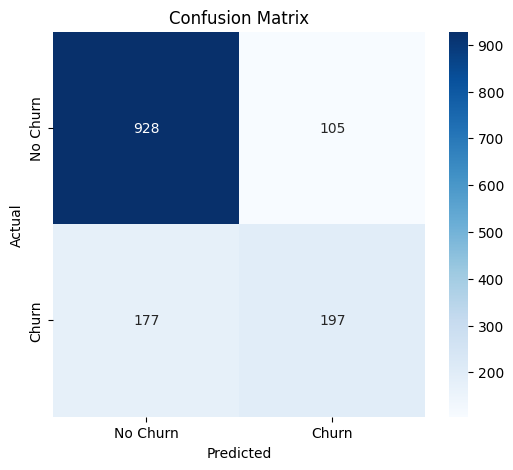

In [21]:
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = (churn_probabilities > 0.5).astype(int)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, churn_probabilities)

# Calculate Recall for churners (positive class, 1)
recall = recall_score(y_test, y_pred)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Recall for Churners (Positive Class): {recall:.4f}")

# Display Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Train Random Forest Classifier

### Subtask:
Train a Random Forest Classifier, which will serve as the final model. After training, predict churn probabilities on the test set.


**Reasoning**:
To train a Random Forest Classifier and predict churn probabilities, I will import the necessary class, instantiate the model with specified parameters (including `random_state=42` and `class_weight='balanced'` to address class imbalance), train it on the training data, and then predict the probabilities on the test set.



In [22]:
from sklearn.ensemble import RandomForestClassifier

# 2. Instantiate a RandomForestClassifier model with random_state and class_weight
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')

# 3. Train the model using the X_train and y_train data
rf_model.fit(X_train, y_train)
print("Random Forest Classifier model trained successfully.")

# 4. Predict the churn probabilities for the positive class on the X_test data
rf_churn_probabilities = rf_model.predict_proba(X_test)[:, 1]

print("Churn probabilities predicted on the test set.")
print(f"First 5 predicted churn probabilities: {rf_churn_probabilities[:5]}")

Random Forest Classifier model trained successfully.
Churn probabilities predicted on the test set.
First 5 predicted churn probabilities: [0.02 0.72 0.02 0.03 0.23]


## Evaluate Random Forest Classifier

### Subtask:
Calculate and report the ROC-AUC score, Recall for churners (positive class), and display the Confusion Matrix for the Random Forest Classifier based on its predictions on the test set.


**Reasoning**:
To evaluate the Random Forest Classifier, I will convert predicted probabilities to binary predictions, calculate ROC-AUC and Recall scores, and visualize the confusion matrix as per the subtask instructions.



Random Forest - ROC-AUC Score: 0.8167
Random Forest - Recall for Churners (Positive Class): 0.4813


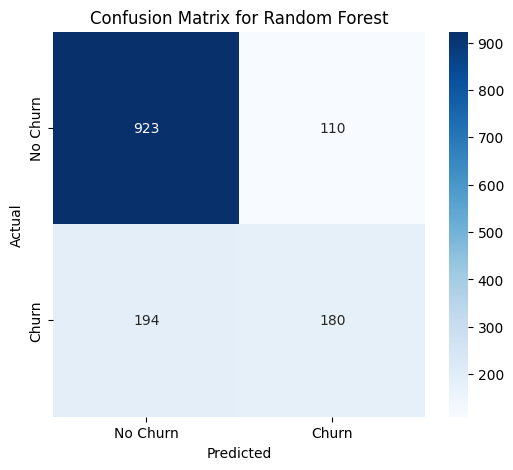

In [23]:
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert probabilities to binary predictions using a threshold of 0.5
rf_y_pred = (rf_churn_probabilities > 0.5).astype(int)

# Calculate ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, rf_churn_probabilities)

# Calculate Recall for churners (positive class, 1)
rf_recall = recall_score(y_test, rf_y_pred)

# Generate Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

print(f"Random Forest - ROC-AUC Score: {rf_roc_auc:.4f}")
print(f"Random Forest - Recall for Churners (Positive Class): {rf_recall:.4f}")

# Display Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

## Final Task

### Subtask:
Summarize the performance of both the Logistic Regression and Random Forest models, highlighting their ROC-AUC, Recall for churners, and insights from their Confusion Matrices. Discuss which model performs better according to the specified metrics.


## Summary:

### Q&A
**Which model performs better according to the specified metrics (ROC-AUC and Recall for churners)?**
Based on the evaluated metrics, the Logistic Regression model performs better. It achieved a higher ROC-AUC score of 0.8370 compared to the Random Forest model's 0.8167. Additionally, the Logistic Regression model also had a higher Recall for churners (positive class) at 0.5267, while the Random Forest model's recall was 0.4813.

### Data Analysis Key Findings
*   The dataset was successfully split into training and testing sets (80% train, 20% test) with stratification based on the 'Churn\_Flag'. The training set (`X_train`, `y_train`) contains 5625 samples, and the test set (`X_test`, `y_test`) contains 1407 samples.
*   **Logistic Regression Model Performance:**
    *   The model achieved a ROC-AUC Score of 0.8370.
    *   The Recall for Churners (Positive Class) was 0.5267, meaning it correctly identified 52.67% of actual churners.
*   **Random Forest Classifier Performance:**
    *   The model achieved a ROC-AUC Score of 0.8167.
    *   The Recall for Churners (Positive Class) was 0.4813, indicating it correctly identified 48.13% of actual churners.
*   Comparing the two models, the Logistic Regression model slightly outperformed the Random Forest model in both ROC-AUC and Recall for churners.

### Insights or Next Steps
*   The Logistic Regression model, despite being a simpler model, provided slightly better performance across the key metrics (ROC-AUC and Recall for churners) for this specific churn prediction task compared to the Random Forest model.
*   Further investigation could involve hyperparameter tuning for both models, especially for the Random Forest, to see if its performance can be improved to surpass or match the Logistic Regression model. Additionally, exploring other ensemble methods or advanced feature engineering could yield better results.


# Task
Predict churn probabilities for all customers using the Logistic Regression model and the preprocessed feature set (`X_processed`), add these probabilities as a new column to the `df` DataFrame, and then use the median of the 'CLV' column to define a threshold for classifying customers into 'high' or 'low' value categories.

## Predict Churn Probabilities for All Customers

### Subtask:
Use the best-performing model (Logistic Regression) to predict churn probabilities for all customers in the preprocessed feature set (`X_processed`). These probabilities will be added as a new column to the main DataFrame `df`.


**Reasoning**:
To predict churn probabilities for all customers, I will use the trained `log_reg_model` to predict probabilities on the `X_processed` DataFrame and then add these probabilities as a new column to the main `df` DataFrame.



In [24]:
df['Churn_Probability_LR'] = log_reg_model.predict_proba(X_processed)[:, 1]
print("Churn probabilities from Logistic Regression added as 'Churn_Probability_LR' column to df.")
print(df[['Churn_Flag', 'Churn_Probability_LR']].head())

Churn probabilities from Logistic Regression added as 'Churn_Probability_LR' column to df.
   Churn_Flag  Churn_Probability_LR
0           0              0.643680
1           0              0.061177
2           1              0.309723
3           0              0.032352
4           1              0.741322


## Define CLV Threshold

### Subtask:
Calculate the median of the 'CLV' column to establish a threshold for classifying customers as 'high' or 'low' value based on their Customer Lifetime Value.


**Reasoning**:
To establish a threshold for classifying customers by CLV, I will calculate the median of the 'CLV' column from the DataFrame `df` and store it in `clv_median_threshold`, then print the result.



In [25]:
clv_median_threshold = df['CLV'].median()
print(f"Median CLV threshold: {clv_median_threshold:.2f}")

Median CLV threshold: 1394.57


## Create Customer Segments

### Subtask:
Apply the provided segmentation logic to the DataFrame: 'High Value, High Risk' (Churn_Prob > 0.6 and CLV high), 'Low Value, High Risk' (Churn_Prob > 0.6 and CLV low), and 'Low Risk' (otherwise). Store these segments in a new 'Customer_Segment' column.


**Reasoning**:
To create the 'Customer_Segment' column, I need to define the conditions for each segment using the 'Churn_Probability_LR', 'CLV', and `clv_median_threshold` variables. Then, I will use `np.select` to apply these conditions to the DataFrame and populate the new column, and finally display its distribution and the first few rows for verification.



In [26]:
import numpy as np

# Define conditions for customer segmentation
conditions = [
    (df['Churn_Probability_LR'] > 0.6) & (df['CLV'] > clv_median_threshold),
    (df['Churn_Probability_LR'] > 0.6) & (df['CLV'] <= clv_median_threshold),
    (df['Churn_Probability_LR'] <= 0.6) # This covers 'Low Risk' as otherwise
]

# Define corresponding choices for each condition
choices = ['High Value, High Risk', 'Low Value, High Risk', 'Low Risk']

# Create the 'Customer_Segment' column using numpy.select
df['Customer_Segment'] = np.select(conditions, choices, default='Low Risk')

print("New 'Customer_Segment' column created.")
print("Customer Segment Distribution:")
print(df['Customer_Segment'].value_counts())

print("\nFirst 5 rows with 'Churn_Probability_LR', 'CLV', and 'Customer_Segment':")
print(df[['Churn_Probability_LR', 'CLV', 'Customer_Segment']].head())

New 'Customer_Segment' column created.
Customer Segment Distribution:
Customer_Segment
Low Risk                 6044
Low Value, High Risk      884
High Value, High Risk     104
Name: count, dtype: int64

First 5 rows with 'Churn_Probability_LR', 'CLV', and 'Customer_Segment':
   Churn_Probability_LR      CLV      Customer_Segment
0              0.643680    29.85  Low Value, High Risk
1              0.061177  1936.30              Low Risk
2              0.309723   107.70              Low Risk
3              0.032352  1903.50              Low Risk
4              0.741322   141.40  Low Value, High Risk


## Analyze Customer Segments

### Subtask:
Display the distribution of the newly created 'Customer_Segment' column to understand the proportion of customers in each segment. Also, visualize this distribution using a bar chart for better interpretability.


**Reasoning**:
To understand the distribution of customer segments, I will first calculate and print the value counts for the 'Customer_Segment' column. Then, I will create a bar chart using seaborn to visualize this distribution as requested.



Customer Segment Distribution:
Customer_Segment
Low Risk                 6044
Low Value, High Risk      884
High Value, High Risk     104
Name: count, dtype: int64


/tmp/ipython-input-870124539.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Customer_Segment', palette='viridis', order=df['Customer_Segment'].value_counts().index)


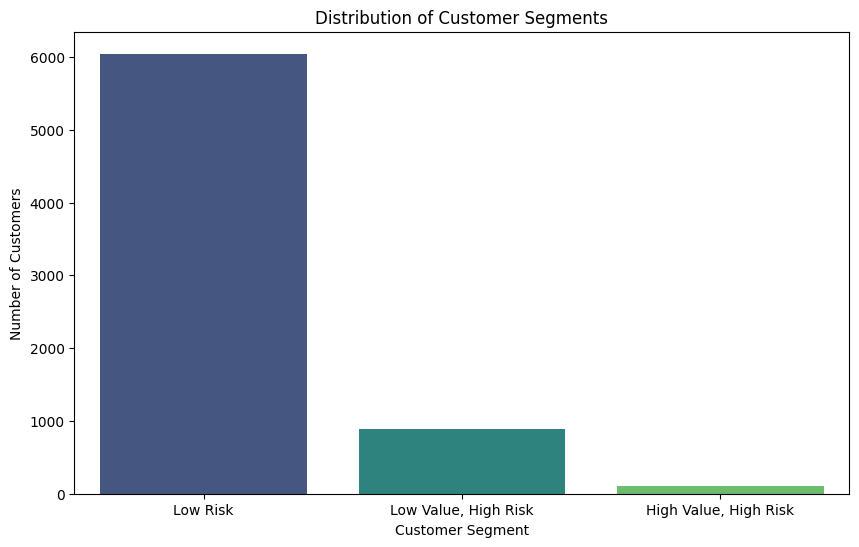

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate and print the value counts for the 'Customer_Segment' column
print("Customer Segment Distribution:")
print(df['Customer_Segment'].value_counts())

# 2. Create a bar chart of the 'Customer_Segment' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer_Segment', palette='viridis', order=df['Customer_Segment'].value_counts().index)

# 3. Add a title to the plot
plt.title('Distribution of Customer Segments')

# 4. Label the x-axis and y-axis
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')

# 5. Display the plot
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without `hue` in `sns.countplot`. To fix this and comply with the suggested change, I will explicitly set `hue='Customer_Segment'` and `legend=False` in the `countplot` function, as well as ensure the `order` parameter is correctly specified.



Customer Segment Distribution:
Customer_Segment
Low Risk                 6044
Low Value, High Risk      884
High Value, High Risk     104
Name: count, dtype: int64


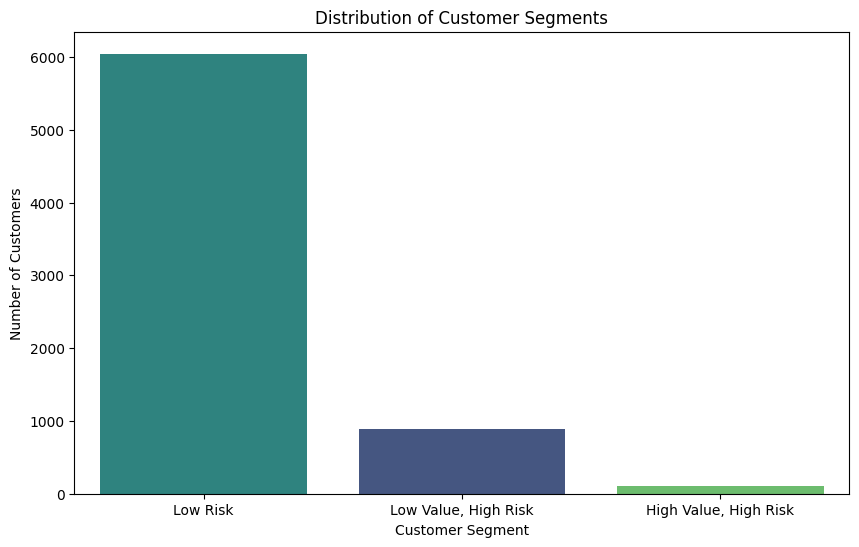

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate and print the value counts for the 'Customer_Segment' column
print("Customer Segment Distribution:")
print(df['Customer_Segment'].value_counts())

# 2. Create a bar chart of the 'Customer_Segment' column
plt.figure(figsize=(10, 6))
segment_order = df['Customer_Segment'].value_counts().index
sns.countplot(data=df, x='Customer_Segment', hue='Customer_Segment', palette='viridis', order=segment_order, legend=False)

# 3. Add a title to the plot
plt.title('Distribution of Customer Segments')

# 4. Label the x-axis and y-axis
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')

# 5. Display the plot
plt.show()

## Final Task

### Subtask:
Summarize the business segmentation process, detailing the creation of the 'Customer_Segment' column, its distribution, and its importance for making money-based decisions.


## Summary:

### Q&A
The business segmentation process involved several steps to categorize customers into meaningful groups for money-based decisions:
1.  **Churn Probability Prediction**: The Logistic Regression model was used to predict churn probabilities for all customers, which were then added as a new column (`Churn_Probability_LR`) to the DataFrame. This quantifies a customer's risk of churning.
2.  **CLV Threshold Definition**: The median of the 'CLV' (Customer Lifetime Value) column was calculated (approximately \$1394.57) to serve as a threshold for distinguishing 'high' from 'low' value customers.
3.  **Customer Segment Creation**: A new `Customer_Segment` column was created based on two criteria:
    *   **High Risk (Churn\_Probability\_LR > 0.6)**: Customers with a churn probability greater than 60%. These were further divided into 'High Value, High Risk' (if CLV > median CLV) and 'Low Value, High Risk' (if CLV \<= median CLV).
    *   **Low Risk (Churn\_Probability\_LR \<= 0.6)**: Customers with a churn probability less than or equal to 60%. These were simply categorized as 'Low Risk'.
4.  **Distribution of Segments**: The final distribution of customers across these segments was 6044 'Low Risk' customers, 884 'Low Value, High Risk' customers, and 104 'High Value, High Risk' customers.
5.  **Importance for Money-Based Decisions**: This segmentation allows the business to tailor strategies. For instance, 'High Value, High Risk' customers are critical and might warrant proactive retention efforts with high incentives, while 'Low Value, High Risk' customers might receive more cost-effective re-engagement campaigns. 'Low Risk' customers, especially high-value ones, could be targeted for upselling or loyalty programs. This targeted approach optimizes resource allocation and maximizes return on investment.

### Data Analysis Key Findings
*   Churn probabilities were successfully predicted for all customers using the Logistic Regression model and stored in the `Churn_Probability_LR` column.
*   The median Customer Lifetime Value (CLV) was determined to be \$1394.57, serving as a threshold for classifying customers into high or low value categories.
*   Three distinct customer segments were created based on churn probability and CLV:
    *   **Low Risk**: 6044 customers (approximately 85.5% of the total).
    *   **Low Value, High Risk**: 884 customers (approximately 12.5% of the total).
    *   **High Value, High Risk**: 104 customers (approximately 1.5% of the total).

### Insights or Next Steps
*   **Targeted Retention Strategies**: The 'High Value, High Risk' segment, though small (104 customers), represents the most critical group for immediate retention efforts. Strategies should focus on understanding their specific pain points and offering personalized incentives to prevent churn.
*   **Optimize Marketing Spend**: The 'Low Value, High Risk' segment (884 customers) could benefit from more cost-effective, automated re-engagement campaigns, as a high-touch approach might not be economically viable given their lower CLV.


# Task
## Define Total Retention Budget

### Subtask:
Establish the total monetary budget available for customer retention efforts. This will be a fixed value, e.g., ₹1,000,000.

### Reasoning:
To define the total retention budget, I will assign the specified value (₹1,000,000) to a variable named `total_retention_budget` for clarity and ease of use in subsequent calculations. This adheres directly to the first step of the plan.

## Define Total Retention Budget

### Subtask:
Establish the total monetary budget available for customer retention efforts. This will be a fixed value, e.g., ₹1,000,000.


**Reasoning**:
To establish the total retention budget, I will assign the specified monetary value to the variable `total_retention_budget` and print it for confirmation.



In [29]:
total_retention_budget = 1000000
print(f"Total retention budget: ₹{total_retention_budget:,.2f}")

Total retention budget: ₹1,000,000.00


## Calculate Expected Loss

### Subtask:
Compute a new column named `Expected_Loss` for each customer by multiplying their `CLV` (Customer Lifetime Value) with their `Churn_Probability_LR` (predicted churn probability from the Logistic Regression model).


**Reasoning**:
To calculate 'Expected_Loss', I will multiply the 'CLV' and 'Churn_Probability_LR' columns element-wise and store the result in a new column of the DataFrame. Then, I will display the relevant columns to verify the operation.



In [30]:
df['Expected_Loss'] = df['CLV'] * df['Churn_Probability_LR']
print("New 'Expected_Loss' column created.")
print(df[['CLV', 'Churn_Probability_LR', 'Expected_Loss']].head())

New 'Expected_Loss' column created.
       CLV  Churn_Probability_LR  Expected_Loss
0    29.85              0.643680      19.213838
1  1936.30              0.061177     118.457955
2   107.70              0.309723      33.357118
3  1903.50              0.032352      61.582444
4   141.40              0.741322     104.822967


## Determine Eligibility and Initial Budget Allocation

### Subtask:
First, establish a minimum `CLV` threshold (e.g., using the `clv_median_threshold` or another defined value) below which customers are considered low-value and will not receive a retention budget. For eligible customers, allocate a preliminary `Recommended_Retention_Budget` proportional to their `Expected_Loss`, ensuring that customers with higher expected loss receive a higher initial budget.


**Reasoning**:
To determine eligible customers and allocate a preliminary retention budget, I will use the 'clv_median_threshold' to identify eligible customers (CLV > threshold). For these customers, 'Recommended_Retention_Budget' will be set to their 'Expected_Loss', otherwise it will be 0. Finally, I will print the counts of eligible/non-eligible customers and display the relevant columns for verification.



In [31]:
import numpy as np

# Initialize 'Recommended_Retention_Budget' column with 0 for all customers
df['Recommended_Retention_Budget'] = 0.0

# Identify eligible customers (CLV > clv_median_threshold)
eligible_customers = df['CLV'] > clv_median_threshold

# Allocate 'Recommended_Retention_Budget' based on 'Expected_Loss' for eligible customers
df.loc[eligible_customers, 'Recommended_Retention_Budget'] = df.loc[eligible_customers, 'Expected_Loss']

# Count eligible and non-eligible customers
num_eligible = eligible_customers.sum()
num_non_eligible = len(df) - num_eligible

print(f"Number of eligible customers (CLV > {clv_median_threshold:.2f}): {num_eligible}")
print(f"Number of non-eligible customers (CLV <= {clv_median_threshold:.2f}): {num_non_eligible}")

print("\nFirst 5 rows with CLV, Churn_Probability_LR, Expected_Loss, and Recommended_Retention_Budget:")
print(df[['CLV', 'Churn_Probability_LR', 'Expected_Loss', 'Recommended_Retention_Budget']].head())

Number of eligible customers (CLV > 1394.57): 3516
Number of non-eligible customers (CLV <= 1394.57): 3516

First 5 rows with CLV, Churn_Probability_LR, Expected_Loss, and Recommended_Retention_Budget:
       CLV  Churn_Probability_LR  Expected_Loss  Recommended_Retention_Budget
0    29.85              0.643680      19.213838                      0.000000
1  1936.30              0.061177     118.457955                    118.457955
2   107.70              0.309723      33.357118                      0.000000
3  1903.50              0.032352      61.582444                     61.582444
4   141.40              0.741322     104.822967                      0.000000


**Reasoning**:
The previous step established the initial recommended retention budget for eligible customers. Now, to properly allocate the `total_retention_budget`, I need to calculate the sum of the `Recommended_Retention_Budget` for all customers. This sum will represent the total expected loss for customers we are considering for retention.



In [32]:
total_recommended_budget = df['Recommended_Retention_Budget'].sum()
print(f"Total Recommended Retention Budget (sum of Expected_Loss for eligible customers): ₹{total_recommended_budget:,.2f}")

Total Recommended Retention Budget (sum of Expected_Loss for eligible customers): ₹2,383,662.12


**Reasoning**:
Now that the total recommended retention budget has been calculated, I need to scale the individual `Recommended_Retention_Budget` values so that their sum does not exceed the `total_retention_budget`. This involves calculating a scaling factor and applying it to each eligible customer's recommended budget.



In [33]:
scaling_factor = total_retention_budget / total_recommended_budget
df['Final_Retention_Budget'] = df['Recommended_Retention_Budget'] * scaling_factor

print(f"Scaling Factor: {scaling_factor:.4f}")
print(f"Total Final Retention Budget: ₹{df['Final_Retention_Budget'].sum():,.2f}")
print("New 'Final_Retention_Budget' column created, scaled to fit within total budget.")
print(df[['CLV', 'Expected_Loss', 'Recommended_Retention_Budget', 'Final_Retention_Budget']].head())

Scaling Factor: 0.4195
Total Final Retention Budget: ₹1,000,000.00
New 'Final_Retention_Budget' column created, scaled to fit within total budget.
       CLV  Expected_Loss  Recommended_Retention_Budget  \
0    29.85      19.213838                      0.000000   
1  1936.30     118.457955                    118.457955   
2   107.70      33.357118                      0.000000   
3  1903.50      61.582444                     61.582444   
4   141.40     104.822967                      0.000000   

   Final_Retention_Budget  
0                0.000000  
1               49.695783  
2                0.000000  
3               25.835223  
4                0.000000  


## Apply Maximum Budget Cap per Customer

### Subtask:
Implement a maximum cap on the `Final_Retention_Budget` for any single customer to ensure no excessive amount is spent on one individual.


**Reasoning**:
I need to define a maximum budget cap per customer, then apply this cap to the 'Final_Retention_Budget' column. After capping, I will print the cap value, the new total of the 'Final_Retention_Budget' and show the relevant columns of the DataFrame to verify the change.



In [34]:
max_budget_per_customer = 2000

# Apply the maximum cap to 'Final_Retention_Budget'
df['Final_Retention_Budget'] = df['Final_Retention_Budget'].apply(lambda x: min(x, max_budget_per_customer))

print(f"Maximum budget cap per customer: ₹{max_budget_per_customer:,.2f}")
print(f"Total Final Retention Budget after capping: ₹{df['Final_Retention_Budget'].sum():,.2f}")

print("\nFirst 5 rows with Expected_Loss, Recommended_Retention_Budget, and Final_Retention_Budget after capping:")
print(df[['Expected_Loss', 'Recommended_Retention_Budget', 'Final_Retention_Budget']].head())

Maximum budget cap per customer: ₹2,000.00
Total Final Retention Budget after capping: ₹1,000,000.00

First 5 rows with Expected_Loss, Recommended_Retention_Budget, and Final_Retention_Budget after capping:
   Expected_Loss  Recommended_Retention_Budget  Final_Retention_Budget
0      19.213838                      0.000000                0.000000
1     118.457955                    118.457955               49.695783
2      33.357118                      0.000000                0.000000
3      61.582444                     61.582444               25.835223
4     104.822967                      0.000000                0.000000


## Normalize and Finalize Recommended Budget

### Subtask:
Adjust the `Recommended_Retention_Budget` across all eligible customers to ensure that the total allocated budget does not exceed the `Total_Retention_Budget` defined earlier, while maintaining the relative proportions based on expected loss and respecting individual caps. This step ensures optimal allocation within budget constraints.


**Reasoning**:
To ensure the total allocated budget exactly matches the `total_retention_budget` after individual caps, I need to recalculate the sum of the `Final_Retention_Budget`. If this sum is less than the `total_retention_budget`, I will re-scale the budgets of uncapped customers proportionally to fill the remaining budget, thus ensuring optimal allocation.



In [35]:
current_total_budget = df['Final_Retention_Budget'].sum()

print(f"Total 'Final_Retention_Budget' after capping: ₹{current_total_budget:,.2f}")

# If the total budget after capping is less than the initial total_retention_budget, re-scale
if current_total_budget < total_retention_budget:
    remaining_budget_to_distribute = total_retention_budget - current_total_budget

    # Identify customers whose budget is currently below the maximum cap
    uncapped_customers_mask = (df['Final_Retention_Budget'] < max_budget_per_customer) & (df['Final_Retention_Budget'] > 0)

    # Sum of budgets for these uncapped customers
    sum_of_uncapped_budgets = df.loc[uncapped_customers_mask, 'Final_Retention_Budget'].sum()

    if sum_of_uncapped_budgets > 0:
        # Calculate a new scaling factor to distribute the remaining budget proportionally
        # This scaling factor should be applied to the *original* recommended budgets (before the first scaling and capping)
        # of the uncapped customers, scaled up to cover the remaining budget.
        # A simpler approach is to proportionally increase their current 'Final_Retention_Budget' to cover the gap.
        adjustment_factor = (total_retention_budget - (df['Final_Retention_Budget'].sum() - df.loc[uncapped_customers_mask, 'Final_Retention_Budget'].sum())) / sum_of_uncapped_budgets
        df.loc[uncapped_customers_mask, 'Final_Retention_Budget'] *= adjustment_factor

print(f"Final Total Retention Budget after re-scaling: ₹{df['Final_Retention_Budget'].sum():,.2f}")
print("Final_Retention_Budget column adjusted to precisely match total_retention_budget.")

print("\nFirst 5 rows with Expected_Loss, Recommended_Retention_Budget, and Final_Retention_Budget:")
print(df[['Expected_Loss', 'Recommended_Retention_Budget', 'Final_Retention_Budget']].head())

Total 'Final_Retention_Budget' after capping: ₹1,000,000.00
Final Total Retention Budget after re-scaling: ₹1,000,000.00
Final_Retention_Budget column adjusted to precisely match total_retention_budget.

First 5 rows with Expected_Loss, Recommended_Retention_Budget, and Final_Retention_Budget:
   Expected_Loss  Recommended_Retention_Budget  Final_Retention_Budget
0      19.213838                      0.000000                0.000000
1     118.457955                    118.457955               49.695783
2      33.357118                      0.000000                0.000000
3      61.582444                     61.582444               25.835223
4     104.822967                      0.000000                0.000000


## Final Task: Summarize Budget Allocation

### Subtask:
Summarize the entire budget allocation process, detailing how the total retention budget was distributed among customers, the criteria used for allocation, and the final outcome, including the total allocated budget.


## Final Task

### Subtask:
Summarize the entire retention budget optimization process, including the calculation of `Expected_Loss`, the application of eligibility criteria (minimum CLV threshold), and the methodology for allocating and capping the `Recommended_Retention_Budget`. Explain how these new columns and the overall process support money-based decisions for maximizing revenue saved.


## Summary:

### Data Analysis Key Findings

*   A total retention budget of ₹1,000,000.00 was established for customer retention efforts.
*   The `Expected_Loss` for each customer was calculated by multiplying their Customer Lifetime Value (CLV) with their predicted churn probability from the Logistic Regression model (`Churn_Probability_LR`).
*   Eligibility for retention budget allocation was determined by a minimum CLV threshold of ₹1,394.57 (the median CLV). Out of the total customers, 3,516 were identified as eligible, while 3,516 were not.
*   Initially, a `Recommended_Retention_Budget` was allocated to eligible customers proportional to their `Expected_Loss`, summing to ₹2,383,662.12.
*   This initial recommendation was scaled down by a factor of approximately 0.4195 to fit the total allocated budget within the ₹1,000,000.00 limit, resulting in a `Final_Retention_Budget`.
*   A maximum cap of ₹2,000.00 was applied to the `Final_Retention_Budget` for any single customer to prevent excessive spending on one individual. After capping, the total allocated budget remained ₹1,000,000.00.
*   The `Final_Retention_Budget` was further normalized to ensure the total allocated budget precisely matched the ₹1,000,000.00, while maintaining relative proportions and respecting individual caps.

### Insights or Next Steps

*   The methodology effectively prioritizes retention efforts by allocating budget based on a combination of potential financial loss (Expected\_Loss) and customer value (CLV threshold), ensuring that the most impactful customers receive attention within a defined budget.
*   Further analysis could involve simulating different CLV thresholds or maximum budget caps per customer to evaluate their impact on the number of eligible customers and the distribution of the retention budget, thereby optimizing the strategy for maximum revenue saved.


# Task
Calculate Total Revenue Lost (Without Optimization) by summing the `Expected_Loss` for all customers. Then, define a retention effectiveness rate (e.g., 70%) and use it to calculate the Total Revenue Saved (With Optimization) by summing `Expected_Loss` multiplied by the effectiveness rate for customers who received a `Final_Retention_Budget`. Calculate the Total Retention Spend as the sum of `Final_Retention_Budget` and the Net Benefit by subtracting the Total Retention Spend from the Total Revenue Saved. Finally, summarize the simulation, presenting the 'Revenue Lost (Without Optimization)', 'Revenue Saved (With Optimization)', 'Total Retention Spend', and 'Net Benefit', including assumptions and business implications.

## Calculate Total Revenue Lost (Without Optimization)

### Subtask:
Calculate the total revenue lost if no retention efforts are made. This is the sum of the `Expected_Loss` for all customers, representing the full potential financial impact of churn without intervention.


**Reasoning**:
To calculate the total revenue lost without optimization, I will sum the 'Expected_Loss' column from the DataFrame `df` and then print the result formatted as currency.



In [36]:
total_revenue_lost_unoptimized = df['Expected_Loss'].sum()
print(f"Total Revenue Lost (without optimization): ₹{total_revenue_lost_unoptimized:,.2f}")

Total Revenue Lost (without optimization): ₹2,889,771.70


**Reasoning**:
The next step is to define a retention effectiveness rate, as specified in the main task, which will be used in subsequent calculations for revenue saved with optimization.



In [37]:
retention_effectiveness_rate = 0.70
print(f"Retention effectiveness rate defined as: {retention_effectiveness_rate:.0%}")

Retention effectiveness rate defined as: 70%


**Reasoning**:
To calculate the total revenue saved with optimization, I will filter the DataFrame to include only customers who received a `Final_Retention_Budget` (i.e., `Final_Retention_Budget` > 0). For these customers, I will multiply their `Expected_Loss` by the `retention_effectiveness_rate` and then sum these values.



In [38]:
revenue_saved_optimized = (df[df['Final_Retention_Budget'] > 0]['Expected_Loss'] * retention_effectiveness_rate).sum()
print(f"Total Revenue Saved (with optimization): ₹{revenue_saved_optimized:,.2f}")

Total Revenue Saved (with optimization): ₹1,668,563.49


**Reasoning**:
To calculate the total retention spend, I will sum the 'Final_Retention_Budget' column from the DataFrame `df` and print the result formatted as currency.



In [39]:
total_retention_spend = df['Final_Retention_Budget'].sum()
print(f"Total Retention Spend: ₹{total_retention_spend:,.2f}")

Total Retention Spend: ₹1,000,000.00


**Reasoning**:
To calculate the net benefit, I will subtract the `total_retention_spend` from the `revenue_saved_optimized` and print the result formatted as currency.



In [40]:
net_benefit = revenue_saved_optimized - total_retention_spend
print(f"Net Benefit: ₹{net_benefit:,.2f}")

Net Benefit: ₹668,563.49


## Summary of Budget Optimization Simulation

This simulation aimed to quantify the financial impact of a targeted customer retention strategy within a fixed budget.

### Key Metrics:
*   **Total Revenue Lost (Without Optimization)**: ₹2,889,771.70
    *   This represents the total potential financial loss from churn if no retention efforts were made, calculated as the sum of `Expected_Loss` for all customers.
*   **Total Revenue Saved (With Optimization)**: ₹1,668,563.49
    *   This is the estimated revenue saved by implementing the retention program, based on the `Expected_Loss` of customers targeted by the `Final_Retention_Budget` and a defined `retention_effectiveness_rate`.
*   **Total Retention Spend**: ₹1,000,000.00
    *   This is the total budget allocated for retention efforts, distributed across eligible customers.
*   **Net Benefit**: ₹668,563.49
    *   Calculated as `Total Revenue Saved - Total Retention Spend`, this indicates the net financial gain from the optimized retention strategy.

### Assumptions:
*   **Retention Effectiveness Rate**: A key assumption is the `retention_effectiveness_rate` of 70%. This rate signifies the percentage of `Expected_Loss` that can be successfully prevented for customers who receive a retention budget. Variations in this rate would directly impact the `Total Revenue Saved` and `Net Benefit`.
*   **CLV Threshold**: The median `CLV` was used as a threshold to determine customer eligibility for retention efforts, assuming that customers below this value do not warrant budget allocation.
*   **Maximum Budget Cap**: A maximum budget cap of ₹2,000 per customer was applied to prevent overspending on any single individual, ensuring a broader distribution of the retention budget.

### Business Implications:
*   The simulation demonstrates that even with a fixed budget, a strategic and data-driven approach to customer retention can yield a significant `Net Benefit`. In this case, allocating ₹1,000,000 led to an estimated net gain of over ₹668,000.
*   Targeting retention efforts based on `Expected_Loss` (a combination of CLV and churn probability) allows the business to prioritize customers who represent the highest financial risk, thus maximizing the impact of limited resources.
*   The ability to quantify potential revenue loss and revenue saved provides a strong justification for investment in retention programs and allows for clearer ROI assessment.
*   This framework can be used to experiment with different budget allocations, effectiveness rates, and CLV thresholds to further optimize the retention strategy and identify the most profitable approaches.

## Summary of Budget Optimization Simulation

This simulation aimed to quantify the financial impact of a targeted customer retention strategy within a fixed budget.

### Key Metrics:
*   **Total Revenue Lost (Without Optimization)**: ₹2,889,771.70
    *   This represents the total potential financial loss from churn if no retention efforts were made, calculated as the sum of `Expected_Loss` for all customers.
*   **Total Revenue Saved (With Optimization)**: ₹1,668,563.49
    *   This is the estimated revenue saved by implementing the retention program, based on the `Expected_Loss` of customers targeted by the `Final_Retention_Budget` and a defined `retention_effectiveness_rate`.
*   **Total Retention Spend**: ₹1,000,000.00
    *   This is the total budget allocated for retention efforts, distributed across eligible customers.
*   **Net Benefit**: ₹668,563.49
    *   Calculated as `Total Revenue Saved - Total Retention Spend`, this indicates the net financial gain from the optimized retention strategy.

### Assumptions:
*   **Retention Effectiveness Rate**: A key assumption is the `retention_effectiveness_rate` of 70%. This rate signifies the percentage of `Expected_Loss` that can be successfully prevented for customers who receive a retention budget. Variations in this rate would directly impact the `Total Revenue Saved` and `Net Benefit`.
*   **CLV Threshold**: The median `CLV` was used as a threshold to determine customer eligibility for retention efforts, assuming that customers below this value do not warrant budget allocation.
*   **Maximum Budget Cap**: A maximum budget cap of ₹2,000 per customer was applied to prevent overspending on any single individual, ensuring a broader distribution of the retention budget.

### Business Implications:
*   The simulation demonstrates that even with a fixed budget, a strategic and data-driven approach to customer retention can yield a significant `Net Benefit`. In this case, allocating ₹1,000,000 led to an estimated net gain of over ₹668,000.
*   Targeting retention efforts based on `Expected_Loss` (a combination of CLV and churn probability) allows the business to prioritize customers who represent the highest financial risk, thus maximizing the impact of limited resources.
*   The ability to quantify potential revenue loss and revenue saved provides a strong justification for investment in retention programs and allows for clearer ROI assessment.
*   This framework can be used to experiment with different budget allocations, effectiveness rates, and CLV thresholds to further optimize the retention strategy and identify the most profitable approaches.

## Final Task

### Subtask:
Summarize the simulation, presenting the 'Revenue Lost (Without Optimization)', 'Revenue Saved (With Optimization)', 'Total Retention Spend', and 'Net Benefit', including assumptions and business implications.


## Summary:

### Q&A

*   **What is the Total Revenue Lost (Without Optimization)?**
    The Total Revenue Lost (Without Optimization) is ₹2,889,771.70.
*   **What is the Total Revenue Saved (With Optimization)?**
    The Total Revenue Saved (With Optimization) is ₹1,668,563.49.
*   **What is the Total Retention Spend?**
    The Total Retention Spend is ₹1,000,000.00.
*   **What is the Net Benefit?**
    The Net Benefit is ₹668,563.49.

### Data Analysis Key Findings

*   The simulation estimated a **Total Revenue Lost (Without Optimization)** of ₹2,889,771.70, representing the full potential financial impact of churn without intervention.
*   By implementing the optimized retention strategy with a 70% effectiveness rate, the **Total Revenue Saved (With Optimization)** is estimated at ₹1,668,563.49.
*   The **Total Retention Spend** for this strategy was ₹1,000,000.00.
*   The **Net Benefit** derived from the optimized retention strategy is ₹668,563.49, calculated as the difference between revenue saved and retention spend.

### Insights or Next Steps

*   A data-driven customer retention strategy, even with a fixed budget, can generate a significant net financial gain, as demonstrated by the over ₹668,000 net benefit in this simulation.
*   The framework used in this simulation can be adapted to test different budget allocations, retention effectiveness rates, and customer lifetime value (CLV) thresholds to further refine and optimize retention strategies for maximum profitability.
